## Basic data analysis

### Import merged data 

In [1]:
import pandas as pd
import numpy as np
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
input_file = r"C:\Users\User\Desktop\UVM_Course\Data_Science_I\Project\SNAP-Diabetes-prevalance\data processing\date_cleaned\merged_food_insecurity_2010_2022.csv" 

In [3]:
all_data = pd.read_csv(input_file)

In [4]:
all_data.head(10)

,high_threshold_in_state,per_fi_less_or_equal_to_low_threshold,county_name,food_insecurity_rate,per_fi_children_hh_income_above_185_fpl,fips,low_threshold_type,num_of_food_insecure_persons,cost_per_meal,child_food_insecurity_rate,num_of_food_insecure_children,high_threshold_type,per_fi_children_hh_income_below_185_fpl,state_name_raw,low_threshold_in_state,state_name,weighted_annual_shortfall,per_fi_btwn_thresholds,per_fi_greater_high_threshold,year
0,1.85,0.327,autauga county,0.134,0.49,1001,snap,7140.0,2.580000,0.203,2980.0,other nutrition program,0.51,alabama,1.3,al,3170830.0,0.208,0.465,2010
1,1.85,0.385,autauga county,0.136,0.37,1001,snap,7310.0,2.820000,0.196,2890.0,other nutrition program,0.63,alabama,1.3,al,3360680.0,0.170,0.445,2011
2,1.85,0.423,autauga county,0.135,0.37,1001,snap,7360.0,2.986678,0.205,3010.0,other nutrition program,0.63,alabama,1.3,al,3850000.0,0.162,0.414,2012
3,1.85,0.461,autauga county,0.139,0.31,1001,snap,7620.0,3.060000,0.215,3090.0,other nutrition program,0.69,alabama,1.3,al,4132000.0,0.170,0.370,2013
4,1.85,0.451,autauga county,0.144,0.28,1001,snap,7930.0,3.160000,0.224,3190.0,other nutrition program,0.72,alabama,1.3,al,4425000.0,0.193,0.356,2014
5,1.85,0.472,autauga county,0.139,0.27,1001,snap,7680.0,3.180000,0.210,2950.0,other nutrition program,0.73,alabama,1.3,al,4376000.0,0.221,0.307,2015
6,1.85,0.467,autauga county,0.134,0.29,1001,snap,7360.0,3.140000,0.199,2760.0,other nutrition program,0.71,alabama,1.3,al,3949000.0,0.194,0.339,2016
7,1.85,0.485,autauga county,0.132,0.34,1001,snap,7270.0,3.190000,0.198,2670.0,other nutrition program,0.66,alabama,1.3,al,3957000.0,0.144,0.371,2017
8,1.85,0.486,autauga county,0.157,0.31,1001,snap,8670.0,3.000000,0.196,2590.0,other nutrition program,0.69,alabama,1.3,al,4439000.0,NaN,0.514,2019
9,1.85,0.476,autauga county,0.145,0.29,1001,snap,8070.0,3.220000,0.181,2380.0,other nutrition program,0.71,alabama,1.3,al,4184000.0,NaN,0.524,2020


In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40853 entries, 0 to 40852
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   high_threshold_in_state                  40853 non-null  float64
 1   per_fi_less_or_equal_to_low_threshold    40853 non-null  float64
 2   county_name                              40853 non-null  object 
 3   food_insecurity_rate                     40853 non-null  float64
 4   per_fi_children_hh_income_above_185_fpl  40843 non-null  float64
 5   fips                                     40853 non-null  int64  
 6   low_threshold_type                       40853 non-null  object 
 7   num_of_food_insecure_persons             40853 non-null  float64
 8   cost_per_meal                            40853 non-null  float64
 9   child_food_insecurity_rate               40846 non-null  float64
 10  num_of_food_insecure_children            40848

In [6]:
#Check to see if all years are present 
all_data['year'].value_counts().sort_index()

year
2010    3143
2011    3143
2012    3143
2013    3143
2014    3142
2015    3142
2016    3142
2017    3142
2018    3141
2019    3142
2020    3143
2021    3143
2022    3144
Name: count, dtype: int64

In [7]:
#Check if fips are 5 
all_data['fips'].apply(lambda x: len(str(x))).value_counts()

fips
5    36742
4     4111
Name: count, dtype: int64

In [12]:
#check if more than one row for the same county and the same year - ideally 1 
all_data.groupby(['fips', 'year']).size().max()

1

In [13]:
all_data.describe()

,high_threshold_in_state,per_fi_less_or_equal_to_low_threshold,food_insecurity_rate,per_fi_children_hh_income_above_185_fpl,fips,num_of_food_insecure_persons,cost_per_meal,child_food_insecurity_rate,num_of_food_insecure_children,per_fi_children_hh_income_below_185_fpl,low_threshold_in_state,weighted_annual_shortfall,per_fi_btwn_thresholds,per_fi_greater_high_threshold,year
count,40853.000000,40853.000000,40853.000000,40843.000000,40853.000000,4.085300e+04,40853.000000,40846.000000,40848.000000,40843.000000,40853.000000,4.085300e+04,23490.000000,40853.000000,40853.000000
mean,1.871391,0.604828,0.138813,0.270266,30383.866595,1.330034e+04,3.044443,0.202987,4436.530307,0.730328,1.560872,7.253743e+06,0.139018,0.315239,2016.000024
std,0.052452,0.141877,0.040850,0.134660,15161.997004,4.404018e+04,0.497871,0.059575,15575.768480,0.135023,0.296628,2.463351e+07,0.085255,0.138590,3.742020
min,1.850000,0.000000,0.022000,0.000000,1001.000000,1.000000e+01,0.000000,0.000000,0.000000,0.000000,1.300000,0.000000e+00,0.000000,0.000000,2010.000000
25%,1.850000,0.508000,0.111000,0.180000,18177.000000,1.530000e+03,2.710000,0.163000,490.000000,0.650000,1.300000,7.830000e+05,0.074000,0.221000,2013.000000
50%,1.850000,0.601000,0.136000,0.266000,29177.000000,3.690000e+03,2.950000,0.202000,1190.000000,0.740000,1.300000,1.883000e+06,0.143000,0.309000,2016.000000
75%,1.850000,0.697000,0.162000,0.350000,45081.000000,9.240000e+03,3.260000,0.243000,3030.000000,0.820000,2.000000,4.836000e+06,0.196000,0.405000,2019.000000
max,2.000000,1.000000,0.379000,1.000000,56045.000000,1.749600e+06,10.610000,0.489000,650480.000000,1.000000,2.000000,1.059086e+09,0.773000,1.000000,2022.000000


In [15]:
#Check missing values 
missing_sum = pd.DataFrame({
    'Variable': all_data.columns,
    'Missing_count': all_data.isnull().sum(),
    'Missing_per': (all_data.isnull().sum() / len(all_data) * 100).round(2)
})

In [17]:
missing_sum

,Variable,Missing_count,Missing_per
high_threshold_in_state,high_threshold_in_state,0,0.00
per_fi_less_or_equal_to_low_threshold,per_fi_less_or_equal_to_low_threshold,0,0.00
county_name,county_name,0,0.00
food_insecurity_rate,food_insecurity_rate,0,0.00
per_fi_children_hh_income_above_185_fpl,per_fi_children_hh_income_above_185_fpl,10,0.02
fips,fips,0,0.00
low_threshold_type,low_threshold_type,0,0.00
num_of_food_insecure_persons,num_of_food_insecure_persons,0,0.00
cost_per_meal,cost_per_meal,0,0.00
child_food_insecurity_rate,child_food_insecurity_rate,7,0.02


In [19]:
all_data[all_data['per_fi_children_hh_income_below_185_fpl'].isnull()]

,high_threshold_in_state,per_fi_less_or_equal_to_low_threshold,county_name,food_insecurity_rate,per_fi_children_hh_income_above_185_fpl,fips,low_threshold_type,num_of_food_insecure_persons,cost_per_meal,child_food_insecurity_rate,num_of_food_insecure_children,high_threshold_type,per_fi_children_hh_income_below_185_fpl,state_name_raw,low_threshold_in_state,state_name,weighted_annual_shortfall,per_fi_btwn_thresholds,per_fi_greater_high_threshold,year
5786,1.85,0.244,forsyth county,0.063,NaN,13117,snap,15410.0,4.15,0.000,0.0,other nutrition program,NaN,georgia,1.30,ga,11305000.0,NaN,0.756,2021
6436,1.85,0.238,oconee county,0.064,NaN,13219,snap,2610.0,3.92,0.000,0.0,other nutrition program,NaN,georgia,1.30,ga,1808000.0,NaN,0.762,2021
7130,2.00,0.300,kalawao county,0.216,NaN,15005,"snap, other nutrition programs",20.0,3.10,NaN,0.0,"snap, other nutrition programs",NaN,hawaii,2.00,hi,11000.0,0.000,0.700,2013
7139,1.85,0.796,kalawao county,0.153,NaN,15005,snap,10.0,5.98,0.253,0.0,other nutrition program,NaN,hawaii,2.00,hi,11000.0,NaN,0.204,2022
23193,1.85,0.499,hunterdon county,0.046,NaN,34019,snap,5910.0,4.08,0.000,0.0,other nutrition program,NaN,new jersey,1.85,nj,4265000.0,NaN,0.501,2021
32787,1.85,0.243,williamson county,0.055,NaN,47187,snap,13320.0,4.51,0.000,0.0,other nutrition program,NaN,tennessee,1.30,tn,10609000.0,NaN,0.757,2021
34755,1.85,0.635,loving county,0.178,NaN,48301,snap,20.0,2.93,NaN,0.0,other nutrition program,NaN,texas,1.65,tx,10000.0,0.365,0.000,2013
37350,1.85,0.448,loudoun county,0.041,NaN,51107,snap,16800.0,4.44,0.000,0.0,other nutrition program,NaN,virginia,2.00,va,13175000.0,NaN,0.552,2021
38042,1.85,0.332,falls church city,0.046,NaN,51610,snap,660.0,4.23,0.000,0.0,other nutrition program,NaN,virginia,2.00,va,449000.0,NaN,0.668,2020
38043,1.85,0.240,falls church city,0.056,NaN,51610,snap,810.0,4.61,0.000,0.0,other nutrition program,NaN,virginia,2.00,va,660000.0,NaN,0.760,2021


Ignore? 

### National trends

<Axes: xlabel='year'>

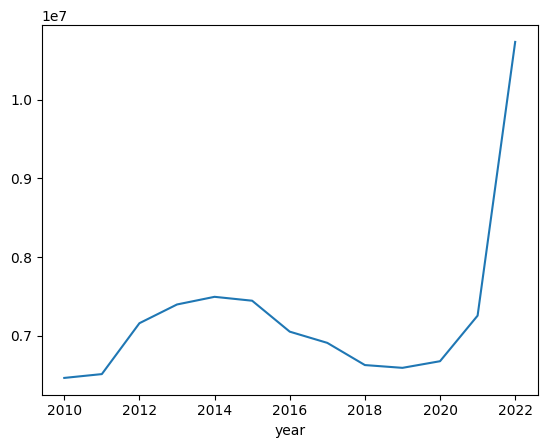

In [21]:
all_data.groupby('year')["weighted_annual_shortfall"].mean().plot()

<Axes: xlabel='year'>

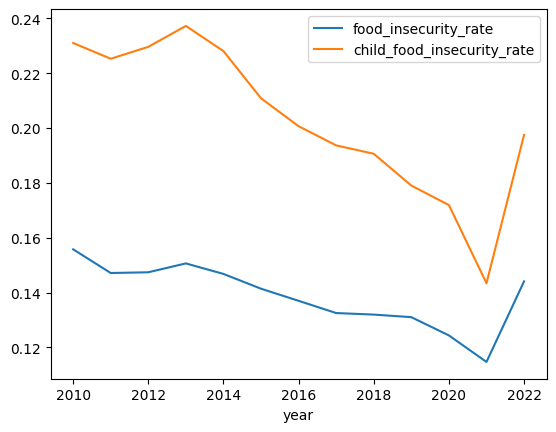

In [22]:
all_data.groupby('year')[["food_insecurity_rate", "child_food_insecurity_rate"]].mean().plot()

<Axes: xlabel='year'>

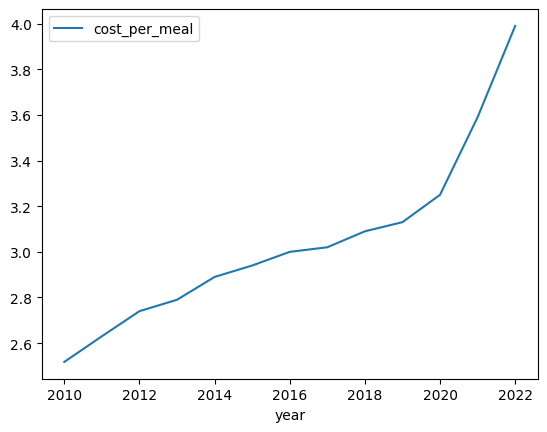

In [23]:
all_data.groupby('year')[["cost_per_meal"]].mean().plot()

### County trends

In [24]:
# Calculate population 
# Estimated population = number of food insecure / FI rate
all_data['estimated_population'] = (
    all_data['num_of_food_insecure_persons'] / 
    (all_data['food_insecurity_rate'] / 100)
)

In [26]:
all_data['estimated_population'].describe()

count    4.085300e+04
mean     1.012471e+07
std      3.237022e+07
min      4.761905e+03
25%      1.098837e+06
50%      2.575949e+06
75%      6.731579e+06
max      1.014027e+09
Name: estimated_population, dtype: float64

In [27]:
#Calculate shortfall per capita 
all_data['shortfall_per_capita'] = (
    all_data['weighted_annual_shortfall'] / 
    (all_data['estimated_population'] / 100)
)

In [28]:
all_data['shortfall_per_capita'].describe()

count    40853.000000
mean        72.520728
std         23.010845
min          0.000000
25%         56.949556
50%         69.301775
75%         84.375258
max        245.789573
Name: shortfall_per_capita, dtype: float64

### Load the PLACES data

In [30]:
places_file = r"C:\Users\User\Desktop\UVM_Course\Data_Science_I\Project\SNAP-Diabetes-prevalance\data processing\date_cleaned\places_2022_data.csv" 

In [31]:
places_data = pd.read_csv(places_file)

In [38]:
places_data.describe()

,countyfips,diagnosed diabetes among adults,obesity among adults
count,3145.000000,3145.000000,3145.000000
mean,30358.549762,11.131669,37.906264
std,15177.640372,2.307522,4.647134
min,59.000000,6.000000,17.700000
25%,18173.000000,9.400000,35.300000
50%,29173.000000,10.800000,38.400000
75%,45079.000000,12.500000,41.000000
max,56045.000000,21.500000,53.000000


In [42]:
places_data.dtypes

fips                     int64
diabetes_prevalence    float64
obesity_prevalence     float64
dtype: object

In [45]:
def clean_places_data(places_data): 
    #rename columns 
    rename_map ={'countyfips': 'fips',
        'diagnosed diabetes among adults': 'diabetes_prevalence',
        'obesity among adults': 'obesity_prevalence'
    }
    places_data.rename(columns=rename_map, inplace=True, errors='ignore')

    #standardize fips code 
    places_data['fips'] = (
        places_data['fips']
        .astype(str)
        .str.zfill(5)
    )
    # ensure prevalence columns are numeric 
    places_data['diabetes_prevalence'] = pd.to_numeric(places_data['diabetes_prevalence'], errors='coerce')
    places_data['obesity_prevalence'] = pd.to_numeric(places_data['obesity_prevalence'], errors='coerce')
    
    # normalize percentages 
    places_data['diabetes_prevalence'] = places_data['diabetes_prevalence'] / 100.0
    places_data['obesity_prevalence'] = places_data['obesity_prevalence'] / 100.0

    return places_data

In [46]:
places_data_cleaned = clean_places_data(places_data)

In [47]:
places_data_cleaned.head()

,fips,diabetes_prevalence,obesity_prevalence
0,01001,0.113,0.384
1,01003,0.102,0.368
2,01005,0.160,0.438
3,01007,0.133,0.414
4,01009,0.116,0.373


### Descriptive analysis 
+ Correlation 

In [60]:
county_avg = all_data.groupby('fips').agg({
    'state_name': 'first',
    'county_name': 'first',
    'weighted_annual_shortfall': 'mean',
    'food_insecurity_rate': 'mean',
    'cost_per_meal': 'mean',
    'shortfall_per_capita': 'mean',
    'num_of_food_insecure_persons': 'mean',
    'child_food_insecurity_rate': 'mean',
    'per_fi_less_or_equal_to_low_threshold': 'mean',
    'per_fi_greater_high_threshold': 'mean',
    'estimated_population': 'mean'
}).reset_index()
county_avg['fips'] = county_avg['fips'].astype(str).str.zfill(5)

In [67]:
county_avg.columns = [
    'fips',
    'state_name',
    'county_name',
    'shortfall_avg_2010_2022',
    'food_insecurity_rate_avg_2010_2022',
    'cost_per_meal_avg_2010_2022',
    'shortfall_per_capita_avg_2010_2022',
    'num_food_insecure_avg_2010_2022',
    'child_fi_rate_avg_2010_2022',
    'per_less_low_threshold_fi_avg_2010_2022',
    'per_above_hight_threshold_fi_avg_2010_2022',
    'population_avg_2010_2018'
]

In [68]:
county_avg

,fips,state_name,county_name,shortfall_avg_2010_2022,food_insecurity_rate_avg_2010_2022,cost_per_meal_avg_2010_2022,shortfall_per_capita_avg_2010_2022,num_food_insecure_avg_2010_2022,child_fi_rate_avg_2010_2022,per_less_low_threshold_fi_avg_2010_2022,per_above_hight_threshold_fi_avg_2010_2022,population_avg_2010_2018
0,01001,al,autauga county,4.289209e+06,0.139917,3.162223,77.117362,7753.333333,0.195583,0.446333,0.431833,5.538911e+06
1,01003,al,baldwin county,1.607862e+07,0.130538,3.479203,78.953495,26247.692308,0.190385,0.436385,0.436154,2.011643e+07
2,01005,al,barbour county,3.052385e+06,0.216923,3.095625,115.660750,5741.538462,0.298154,0.571154,0.300462,2.639780e+06
3,01007,al,bibb county,1.894395e+06,0.159615,3.013433,83.837650,3608.461538,0.235000,0.500538,0.336769,2.261172e+06
4,01009,al,blount county,3.901295e+06,0.128308,2.997825,67.466397,7409.230769,0.204154,0.533154,0.331308,5.768646e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
3151,56037,wy,sweetwater county,2.773425e+06,0.113692,3.191988,63.587859,4963.076923,0.168154,0.394846,0.511308,4.370514e+06
3152,56039,wy,teton county,1.780897e+06,0.106923,4.328624,79.541845,2382.307692,0.137231,0.328538,0.534923,2.239244e+06
3153,56041,wy,uinta county,1.338271e+06,0.124615,2.988919,64.670490,2580.000000,0.174231,0.469769,0.433769,2.069889e+06
3154,56043,wy,washakie county,5.271192e+05,0.116615,3.180282,64.479092,956.923077,0.163692,0.461077,0.389615,8.198998e+05


In [69]:
county_avg.dtypes

fips                                           object
state_name                                     object
county_name                                    object
shortfall_avg_2010_2022                       float64
food_insecurity_rate_avg_2010_2022            float64
cost_per_meal_avg_2010_2022                   float64
shortfall_per_capita_avg_2010_2022            float64
num_food_insecure_avg_2010_2022               float64
child_fi_rate_avg_2010_2022                   float64
per_less_low_threshold_fi_avg_2010_2022       float64
per_above_hight_threshold_fi_avg_2010_2022    float64
population_avg_2010_2018                      float64
dtype: object

In [105]:
### Merge the aggregated county data from MMG to PLACES data
county_avg_places = county_avg.merge(
    places_data_cleaned, 
    on='fips', 
    how='inner'
)

In [106]:
county_avg_places.head()

,fips,state_name,county_name,shortfall_avg_2010_2022,food_insecurity_rate_avg_2010_2022,cost_per_meal_avg_2010_2022,shortfall_per_capita_avg_2010_2022,num_food_insecure_avg_2010_2022,child_fi_rate_avg_2010_2022,per_less_low_threshold_fi_avg_2010_2022,per_above_hight_threshold_fi_avg_2010_2022,population_avg_2010_2018,diabetes_prevalence,obesity_prevalence
0,01001,al,autauga county,4.289209e+06,0.139917,3.162223,77.117362,7753.333333,0.195583,0.446333,0.431833,5.538911e+06,0.113,0.384
1,01003,al,baldwin county,1.607862e+07,0.130538,3.479203,78.953495,26247.692308,0.190385,0.436385,0.436154,2.011643e+07,0.102,0.368
2,01005,al,barbour county,3.052385e+06,0.216923,3.095625,115.660750,5741.538462,0.298154,0.571154,0.300462,2.639780e+06,0.160,0.438
3,01007,al,bibb county,1.894395e+06,0.159615,3.013433,83.837650,3608.461538,0.235000,0.500538,0.336769,2.261172e+06,0.133,0.414
4,01009,al,blount county,3.901295e+06,0.128308,2.997825,67.466397,7409.230769,0.204154,0.533154,0.331308,5.768646e+06,0.116,0.373


In [107]:
county_avg_places.describe()

,shortfall_avg_2010_2022,food_insecurity_rate_avg_2010_2022,cost_per_meal_avg_2010_2022,shortfall_per_capita_avg_2010_2022,num_food_insecure_avg_2010_2022,child_fi_rate_avg_2010_2022,per_less_low_threshold_fi_avg_2010_2022,per_above_hight_threshold_fi_avg_2010_2022,population_avg_2010_2018,diabetes_prevalence,obesity_prevalence
count,3.144000e+03,3144.000000,3144.000000,3144.000000,3.144000e+03,3144.000000,3144.000000,3144.000000,3.144000e+03,3144.000000,3144.000000
mean,7.298295e+06,0.138837,3.048538,72.658096,1.330847e+04,0.202953,0.604884,0.315289,1.012093e+07,0.111319,0.379077
std,2.438224e+07,0.036336,0.296512,18.842165,4.353635e+04,0.048263,0.122954,0.107384,3.232212e+07,0.023079,0.046472
min,8.653077e+03,0.045692,2.212190,25.525774,1.615385e+01,0.065385,0.243846,0.002846,8.896194e+03,0.060000,0.177000
25%,8.071994e+05,0.114288,2.870985,59.835182,1.565192e+03,0.169981,0.521212,0.244231,1.096456e+06,0.094000,0.353000
50%,1.930024e+06,0.136231,3.002751,71.131074,3.727692e+03,0.201231,0.603462,0.311923,2.575454e+06,0.108000,0.384000
75%,4.873603e+06,0.160692,3.152523,83.605315,9.277692e+03,0.235154,0.684346,0.382500,6.736683e+06,0.125250,0.410000
max,7.599476e+08,0.314077,5.888073,209.121080,1.329729e+06,0.396769,0.980692,0.710692,9.966066e+08,0.215000,0.530000


In [154]:
county_avg_places.columns

Index(['fips', 'state_name', 'county_name', 'shortfall_avg_2010_2022',
       'food_insecurity_rate_avg_2010_2022', 'cost_per_meal_avg_2010_2022',
       'shortfall_per_capita_avg_2010_2022', 'num_food_insecure_avg_2010_2022',
       'child_fi_rate_avg_2010_2022',
       'per_less_low_threshold_fi_avg_2010_2022',
       'per_above_hight_threshold_fi_avg_2010_2022',
       'population_avg_2010_2018', 'diabetes_prevalence',
       'obesity_prevalence'],
      dtype='object')

In [74]:
### Variables for correlation
corr_vars = [
    'shortfall_per_capita_avg_2010_2022',
    'food_insecurity_rate_avg_2010_2022',
    'cost_per_meal_avg_2010_2022',
    'child_fi_rate_avg_2010_2022',
    'diabetes_prevalence', 
    'obesity_prevalence'
]

In [108]:
corr_matrix = county_avg_places[corr_vars].corr()

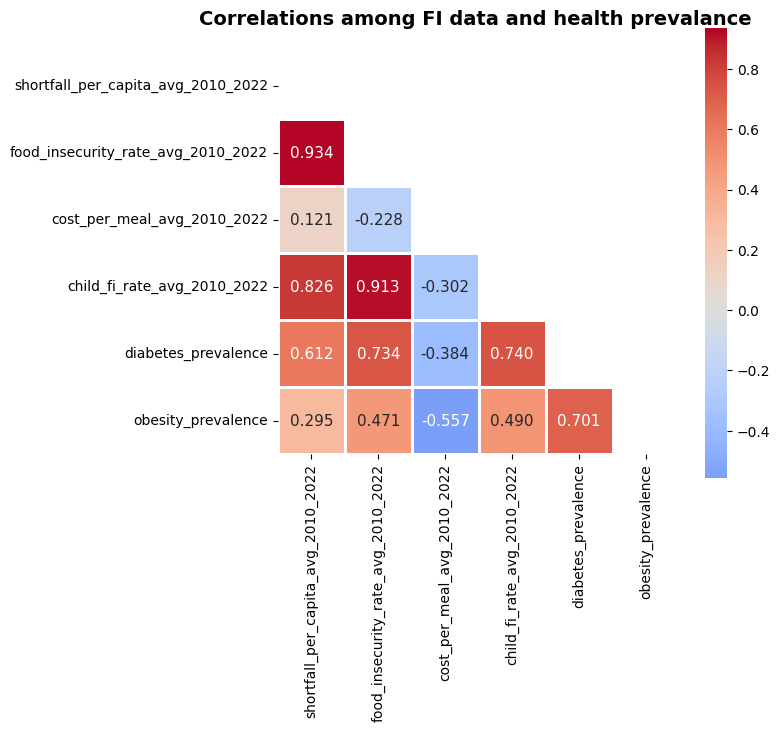

In [109]:
#Draw heatmap 
plt.figure(figsize=(8,8))

#hide the upper triangle 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=0)

sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            mask = mask, annot_kws={'size': 11})

plt.title('Correlations among FI data and health prevalance ', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()

**Observations:**
1. Food insecurity variables
+ "food insecurity rate" and "shortfall_per_capita" have a strong correlation - 0.93
+ "child food insecurity rate" and "food insecurity rate" - 0.91
+ Counties with higher food insecurity also have higher food budget shortfalls and higher child food insecurity.
  
2. Health outcomes correlate strongly with food insecurity
+ Diabetes prevalence:
    + 0.73 with food insecurity
    + 0.61 with shortfall
    + 0.74 with child FI rate

+ Obesity prevalence:
    + 0.47 with food insecurity
    + 0.30 with shortfall
    + 0.49 with child FI
    + 0.70 with diabetes
+ Food insecurity is more predictive for diabetes prevalence than obesity prevalence.

3. Cost per meal have negative correlation both with FI and Health outcomes
+ High cost-of-living counties have higher income, better access to healthcare so overall better population health
+ We should not consider "cost per meal" as "affordability" but more like a signal for socioeconomic state of that county. 

### Explanatory analysis

#### Load the census data

In [84]:
census_file = r"C:\Users\User\Desktop\UVM_Course\Data_Science_I\Project\SNAP-Diabetes-prevalance\data processing\date_cleaned\census_data.csv" 

In [85]:
census_data = pd.read_csv(census_file)

In [86]:
census_data.head()

,fips,county_name,estimate_total_households,median_household_income,percent_families_wo_employment,per_hs_grad,per_col_grad,_merge
0,1001,"Autauga County, Alabama",22308,68315,17.9,90.4,29.6,both
1,1003,"Baldwin County, Alabama",90802,71039,20.3,91.6,32.6,both
2,1005,"Barbour County, Alabama",9016,39712,26.2,76.5,11.9,both
3,1007,"Bibb County, Alabama",7216,50669,22.5,78.9,10.9,both
4,1009,"Blount County, Alabama",21626,57440,20.1,81.8,14.7,both


In [133]:
# Standardize the median_household_income column
## Covert string to numeric 
census_data['median_household_income'] = pd.to_numeric(census_data['median_household_income'], errors='coerce'
) 
## Apply z-score distribution 
median_inc_mean = census_data['median_household_income'].mean()
median_inc_sigma = census_data['median_household_income'].std()
## Add new variable to census data 
census_data['median_inc_standardized'] = (census_data['median_household_income'] - median_inc_mean)/ median_inc_sigma

In [134]:
census_data.columns

Index(['fips', 'county_name', 'estimate_total_households',
       'median_household_income', 'percent_families_wo_employment',
       'per_hs_grad', 'per_col_grad', '_merge', 'median_inc_standardized'],
      dtype='object')

In [135]:
census_data.dtypes

fips                               object
county_name                        object
estimate_total_households           int64
median_household_income           float64
percent_families_wo_employment    float64
per_hs_grad                       float64
per_col_grad                      float64
_merge                             object
median_inc_standardized           float64
dtype: object

In [138]:
test_columns = ['median_household_income','percent_families_wo_employment', 'per_hs_grad', 'per_col_grad', 'median_inc_standardized']
check_collinearity = census_data[test_columns].corr()

In [139]:
check_collinearity

,median_household_income,percent_families_wo_employment,per_hs_grad,per_col_grad,median_inc_standardized
median_household_income,1.000000,-0.610314,0.547495,0.665974,1.000000
percent_families_wo_employment,-0.610314,1.000000,-0.332491,-0.348180,-0.610314
per_hs_grad,0.547495,-0.332491,1.000000,0.549899,0.547495
per_col_grad,0.665974,-0.348180,0.549899,1.000000,0.665974
median_inc_standardized,1.000000,-0.610314,0.547495,0.665974,1.000000


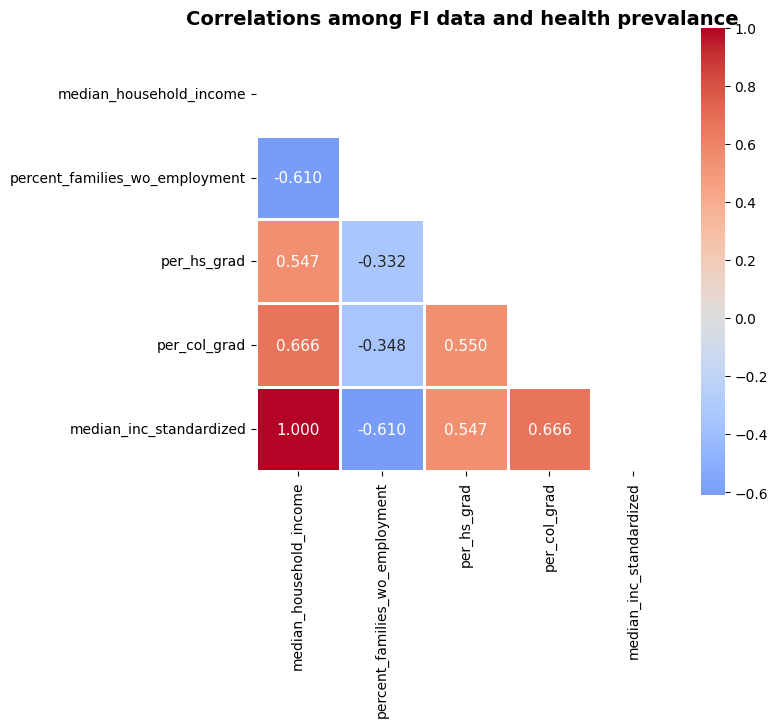

In [140]:
#Draw heatmap 
plt.figure(figsize=(8,8))

#hide the upper triangle 
mask = np.triu(np.ones_like(check_collinearity, dtype=bool), k=0)

sns.heatmap(check_collinearity, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            mask = mask, annot_kws={'size': 11})

plt.title('Correlations among FI data and health prevalance ', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()

**Why these confounders?**
+ Lower income drives higher food insecurity and poor health. Need to control for it or else the relationship between FI and health pravelance will be overstated.
+ Lower education correlates with lower income and higher FI rate.
+ High unemployment - driver of food insecurity

**Model Formuation**

Run seperate regression model for each health outcome:

+  Model 1: Diabetes Prevalence
$$\text{Diabetes Prevalence} = \beta_0 + \beta_1 \cdot \text{Avg Shortfall Per Capita} + \beta_2 \cdot \text{Median Income Statardized} + \beta_3 \cdot \text{Per Col Grad} + \beta_4 \cdot \text{Per Families W/O Employ} + \epsilon$$

+  Model 2: Obesity Prevalence
$$\text{Obesity Prevalence} = \beta_0 + \beta_1 \cdot \text{Avg Shortfall Per Capita} + \beta_2 \cdot \text{Median Income Statardized} + \beta_3 \cdot \text{Per Col Grad} + \beta_4 \cdot \text{Per Families W/O Employ} + \epsilon$$

In [141]:
census_data['fips'] = census_data['fips'].astype(str).str.zfill(5)
#Merge the data
explo_analysis = county_avg_places.merge(
    census_data, 
    on='fips', 
    how='inner')

In [142]:
explo_analysis.head()

,fips,state_name,county_name_x,shortfall_avg_2010_2022,food_insecurity_rate_avg_2010_2022,cost_per_meal_avg_2010_2022,shortfall_per_capita_avg_2010_2022,num_food_insecure_avg_2010_2022,child_fi_rate_avg_2010_2022,per_less_low_threshold_fi_avg_2010_2022,...,diabetes_prevalence,obesity_prevalence,county_name_y,estimate_total_households,median_household_income,percent_families_wo_employment,per_hs_grad,per_col_grad,_merge,median_inc_standardized
0,01001,al,autauga county,4.289209e+06,0.139917,3.162223,77.117362,7753.333333,0.195583,0.446333,...,0.113,0.384,"Autauga County, Alabama",22308,68315.0,17.9,90.4,29.6,both,0.336969
1,01003,al,baldwin county,1.607862e+07,0.130538,3.479203,78.953495,26247.692308,0.190385,0.436385,...,0.102,0.368,"Baldwin County, Alabama",90802,71039.0,20.3,91.6,32.6,both,0.490256
2,01005,al,barbour county,3.052385e+06,0.216923,3.095625,115.660750,5741.538462,0.298154,0.571154,...,0.160,0.438,"Barbour County, Alabama",9016,39712.0,26.2,76.5,11.9,both,-1.272602
3,01007,al,bibb county,1.894395e+06,0.159615,3.013433,83.837650,3608.461538,0.235000,0.500538,...,0.133,0.414,"Bibb County, Alabama",7216,50669.0,22.5,78.9,10.9,both,-0.656021
4,01009,al,blount county,3.901295e+06,0.128308,2.997825,67.466397,7409.230769,0.204154,0.533154,...,0.116,0.373,"Blount County, Alabama",21626,57440.0,20.1,81.8,14.7,both,-0.274998


In [149]:
nan_rows = explo_analysis.isnull().any(axis=1)

In [150]:
explo_analysis[nan_rows]

,fips,state_name,county_name_x,shortfall_avg_2010_2022,food_insecurity_rate_avg_2010_2022,cost_per_meal_avg_2010_2022,shortfall_per_capita_avg_2010_2022,num_food_insecure_avg_2010_2022,child_fi_rate_avg_2010_2022,per_less_low_threshold_fi_avg_2010_2022,...,diabetes_prevalence,obesity_prevalence,county_name_y,estimate_total_households,median_household_income,percent_families_wo_employment,per_hs_grad,per_col_grad,_merge,median_inc_standardized
2675,48301,tx,loving county,8653.076923,0.180154,3.066504,94.086923,16.153846,0.205455,0.588231,...,0.095,0.326,"Loving County, Texas",40,NaN,0.0,96.8,0.0,both,NaN


In [175]:
test_columns_2 = ['median_household_income','percent_families_wo_employment', 'per_hs_grad', 'per_col_grad', 'median_inc_standardized','shortfall_avg_2010_2022','shortfall_per_capita_avg_2010_2022']
check_coli_2 = explo_analysis[test_columns_2].corr()

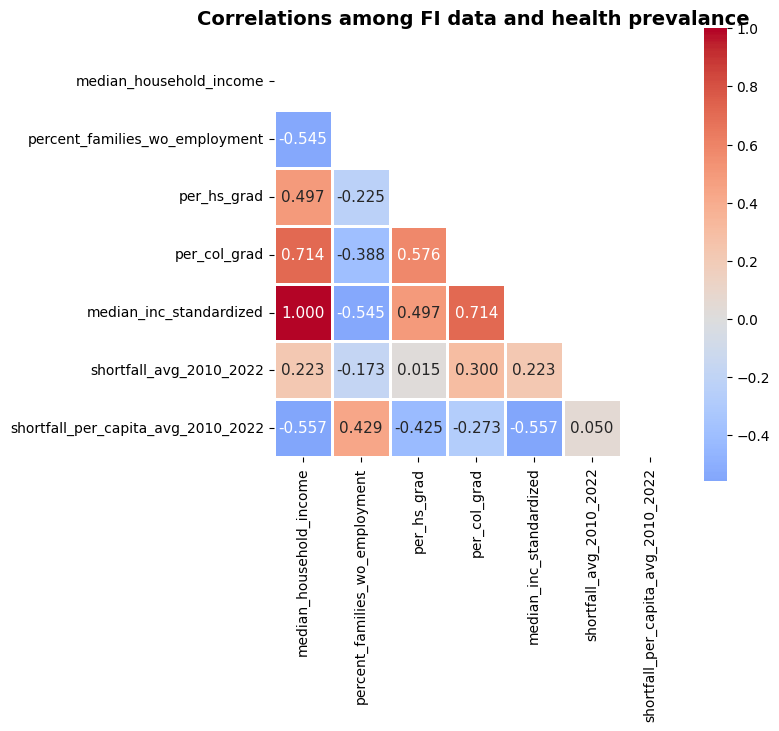

In [177]:
#Draw heatmap 
plt.figure(figsize=(8,8))

#hide the upper triangle 
mask = np.triu(np.ones_like(check_coli_2, dtype=bool), k=0)

sns.heatmap(check_coli_2, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            mask = mask, annot_kws={'size': 11})

plt.title('Correlations among FI data and health prevalance ', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()

In [116]:
import statsmodels.api as sm

In [143]:
#Run OLS 
def run_explanatory_ols(data, y_var):
    
    ## Define independent varibles X
    X_vars = ['shortfall_per_capita_avg_2010_2022','median_inc_standardized','percent_families_wo_employment','per_col_grad']
    X = explo_analysis[X_vars]
    X = sm.add_constant(X)
    
    ## Define dependent varibles Y
    y = explo_analysis[y_var] 
    
    ## Fit the OLS model
    model = sm.OLS(y, X, missing='drop').fit()

    return model

In [144]:
## Diabetes model 
diabetes_results = run_explanatory_ols(explo_analysis, 'diabetes_prevalence')
print(diabetes_results.summary())

                             OLS Regression Results                            
Dep. Variable:     diabetes_prevalence   R-squared:                       0.542
Model:                             OLS   Adj. R-squared:                  0.542
Method:                  Least Squares   F-statistic:                     930.1
Date:                 Sat, 29 Nov 2025   Prob (F-statistic):               0.00
Time:                         07:36:14   Log-Likelihood:                 8614.7
No. Observations:                 3143   AIC:                        -1.722e+04
Df Residuals:                     3138   BIC:                        -1.719e+04
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

**Observations** 
+ Shortfall Per Capita - $+0.0006$ - higher shortfall per person is independently associated with a higher diabetes prevalence.
+ Median Inc Standardized $-0.0036$ - standardiviation increase in median household income is associated with a 0.0036 decrease in diabetes prevalence.
+ Per College Grad $-0.0008$ - higher college graduation rate is independently associated with a lower diabetes prevalance.
+ Families W/O Employment $-0.0006$ - increase in the percatnage of families w/o employment is associated with lower diabetes prevalance.
  
**Possible explanation**
+ Families W/O Employment is acting as a proxy for an unobserved factor (Age, Urbbanization. Take us back to the conversation of economic hardship - where we have different access to healthcare) 

In [145]:
## Obesity model 
obesity_results = run_explanatory_ols(explo_analysis, 'obesity_prevalence')
print(obesity_results.summary())

                            OLS Regression Results                            
Dep. Variable:     obesity_prevalence   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     758.7
Date:                Sat, 29 Nov 2025   Prob (F-statistic):               0.00
Time:                        07:36:28   Log-Likelihood:                 6249.8
No. Observations:                3143   AIC:                        -1.249e+04
Df Residuals:                    3138   BIC:                        -1.246e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

## [Insert observations here]

## Sensitivity analysis

In [147]:
def run_sensitivity_ols(data, y_var):
    ## Reduce the x vars 
    X_vars_sensitive = [
        'shortfall_per_capita_avg_2010_2022', 
        'median_inc_standardized', 
        'per_col_grad'
    ]
    y = data[y_var]
    X_sensitive = data[X_vars_sensitive]
    X_sensitive = sm.add_constant(X_sensitive)
    ## Fit the OLS model
    model = sm.OLS(y, X_sensitive, missing='drop').fit()
    
    return model

In [153]:
## Diabetes sensitivity model
diabetes_sensitivity_results = run_sensitivity_ols(explo_analysis, 'diabetes_prevalence')
print(diabetes_sensitivity_results.summary())

                             OLS Regression Results                            
Dep. Variable:     diabetes_prevalence   R-squared:                       0.524
Model:                             OLS   Adj. R-squared:                  0.524
Method:                  Least Squares   F-statistic:                     1154.
Date:                 Sat, 29 Nov 2025   Prob (F-statistic):               0.00
Time:                         08:06:20   Log-Likelihood:                 8554.0
No. Observations:                 3143   AIC:                        -1.710e+04
Df Residuals:                     3139   BIC:                        -1.708e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

The Shortfall Per Capita variable remains  the same in magnitude and significance. This strongly confirms that chronic economic food stress has an independent, positive relationship with diabetes prevalence, even after controlling for income and education.

In [152]:
## Obesity sensitivity model
obesity_sensitivity_results = run_sensitivity_ols(explo_analysis, 'obesity_prevalence')
print(obesity_sensitivity_results.summary())

                            OLS Regression Results                            
Dep. Variable:     obesity_prevalence   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     944.9
Date:                Sat, 29 Nov 2025   Prob (F-statistic):               0.00
Time:                        08:04:30   Log-Likelihood:                 6197.7
No. Observations:                3143   AIC:                        -1.239e+04
Df Residuals:                    3139   BIC:                        -1.236e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

**Observation**
+ The Shortfall Per Capita is no longer statistically significant ($p =0.148$). Instead the social factors like Median Income Standardzied and Per Col Grad become the strong indicators of obesity prevalence.
+ It's not the unique shortfall of the food budget that matters the most but the overall lack of economic resources and education that drives the outcome.

## Visualization 

In [159]:
import plotly.express as px

In [160]:
def create_county_choropleth(df, color_column, title):
    fig = px.choropleth(
        df, 
        geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
        locations='fips', 
        color=color_column, 
        color_continuous_scale="Reds", 
        range_color=(df[color_column].min(), df[color_column].max()),
        scope="usa",
        hover_name='county_name', # Show county name on hover
        hover_data={
            'fips': True, 
            color_column: ':.2%', # prevalence as a percentage
            'shortfall_per_capita_avg_2010_2022': ':.0f' # shortfall
        },
        title=title,
        height=600
    )
    
    fig.update_layout(
        margin={"r":0,"t":40,"l":0,"b":0},
        coloraxis_colorbar=dict(title=color_column.replace('_', ' ').title())
    )
    fig.show()

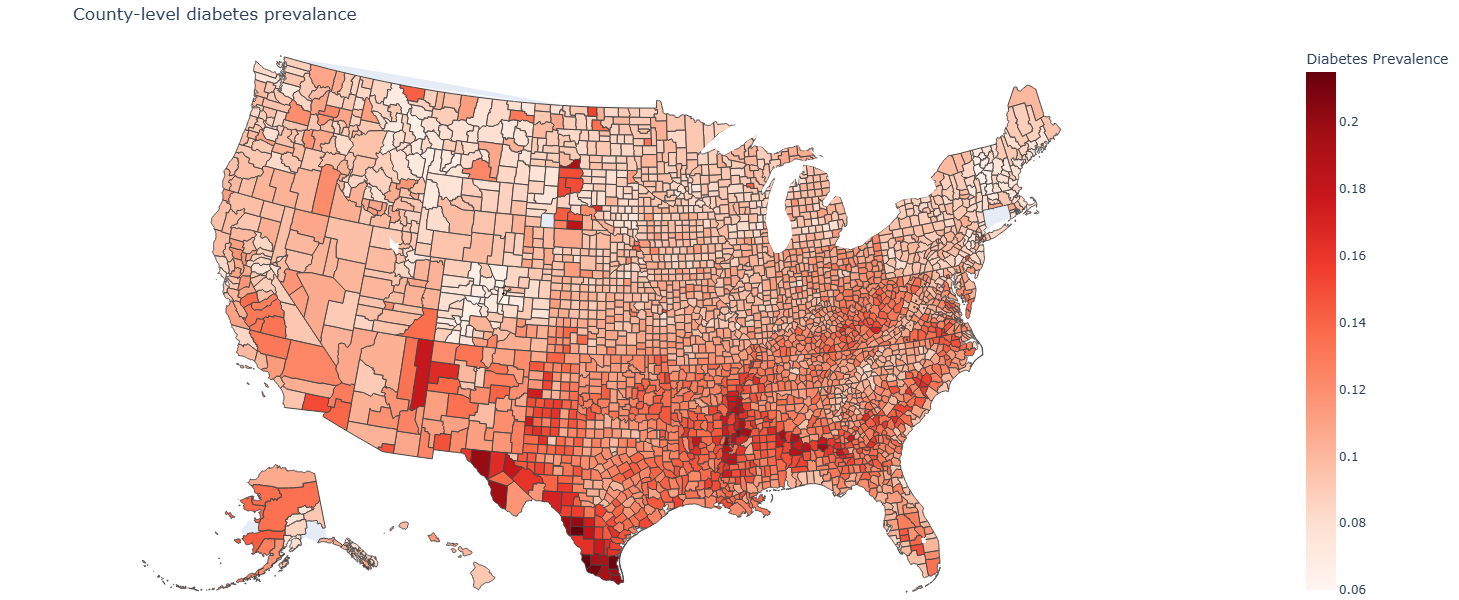

In [162]:
create_county_choropleth(
    county_avg_places, 
    'diabetes_prevalence', 
    'County-level diabetes prevalance'
)

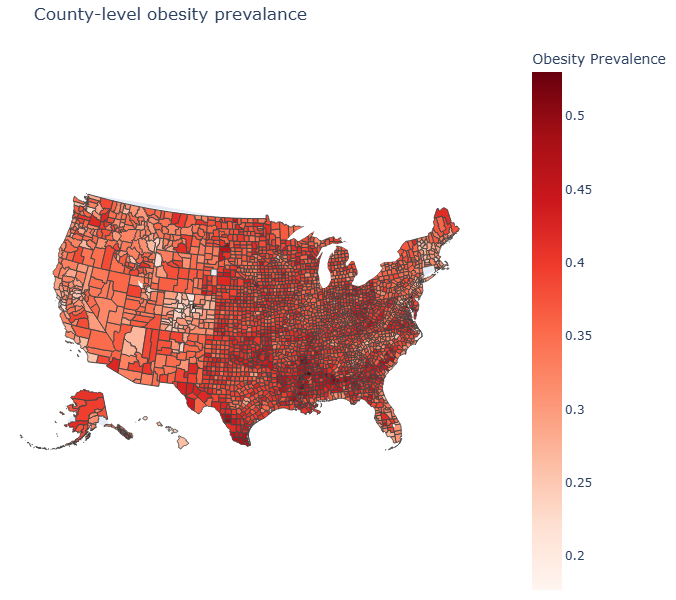

In [163]:
create_county_choropleth(
    county_avg_places, 
    'obesity_prevalence', 
    'County-level obesity prevalance'
)

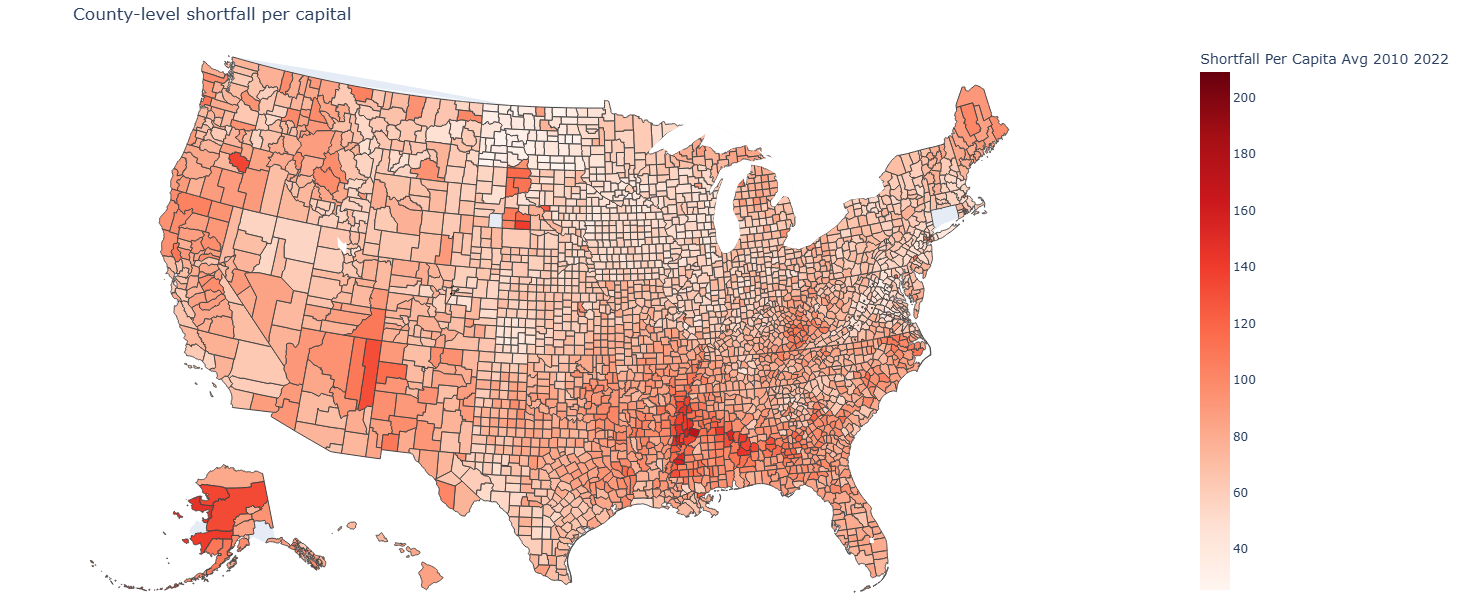

In [179]:
create_county_choropleth(
    county_avg_places, 
    'shortfall_per_capita_avg_2010_2022', 
    'County-level shortfall per capital'
)

In [165]:
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

In [169]:
plot_data = explo_analysis[[
    'median_inc_standardized', 
    'per_col_grad', 
    'diabetes_prevalence'
]].dropna()

In [170]:
#Define the variables 
X = plot_data['median_inc_standardized']
Y = plot_data['per_col_grad']
Z = plot_data['diabetes_prevalence']

In [171]:
# Grid of points to interpolate the data
xi = np.linspace(X.min(), X.max(), 100)
yi = np.linspace(Y.min(), Y.max(), 100)
XI, YI = np.meshgrid(xi, yi)
#Interpolate 
ZI = griddata((X, Y), Z, (XI, YI), method='cubic')

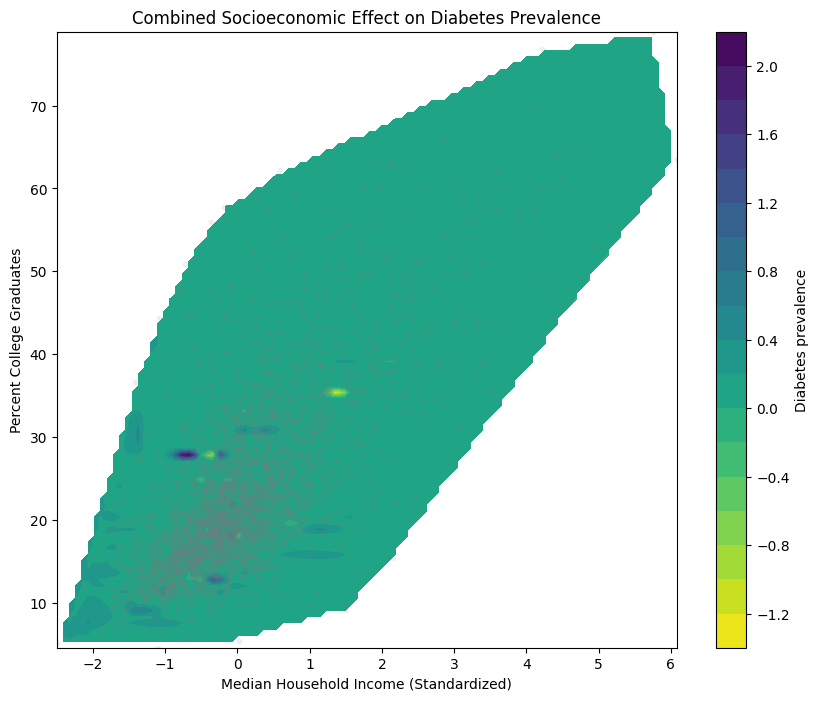

In [172]:
#Create plot 
plt.figure(figsize=(10, 8))
CS = plt.contourf(XI, YI, ZI, levels=20, cmap='viridis_r') 
plt.colorbar(CS, label='Diabetes prevalence')
plt.scatter(X, Y, marker='.', c='gray', alpha=0.1) # Show original data points for context

plt.xlabel('Median Household Income (Standardized)')
plt.ylabel('Percent College Graduates')
plt.title('Combined Socioeconomic Effect on Diabetes Prevalence')
plt.show()